**You are a data scientist working for a healthcare company, and you have been tasked with creating a decision tree to help identify patients with diabetes based on a set of clinical variables. You have been given a dataset (diabetes.csv) with the following variables:**
1. **Pregnancies**: Number of times pregnant. **(integer value)**
2. **Glucose**: Plasma glucose concentration for **2 hours** in an **oral glucose tolerance test. (integer value)**
3. **BloodPressure**: Diastolic blood pressure. **(measured in mmHg, integer value)**
4. **SkinThickness**: Triceps skin fold thickness. **(measured in mm, integer value)**
5. **Insulin**: 2-Hour serum insulin. **(measured in muU/ml, integer value)**
6. **BMI**: Body mass index. **(measured in: weight in kg or square of height in m, float value)**
7. **DiabetesPedigreeFunction**: A **function** which scores **likelihood of diabetes** based on **family history. (float value)**
8. **Age**: Age in years. **(integer value)**
9. **Outcome**: A **Class variable** where it shows that if a **person is non-diabetic**, then the **value will be ZERO**. Otherwise, if a **person is diabetic**, then the **value will be 1**. **(integer value)**

**Your goal is to create a decision tree to predict whether a patient has diabetes based on the other variables.**

<hr>

**Before we start the assignment, let's take a simple demonstration of 'Diabetes.csv' dataset, such as:**
1. **Training and testing of 'Diabetes.csv' dataset or data model.**
2. **Creation of a decision tree classifier object.**
3. **Calculating the accuracy of the well-trained and well-tested 'Diabetes.csv' dataset or data model.**

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
diabetes_df = pd.read_csv("diabetes.csv")

In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Split the data into features (X) and target (y)
X = diabetes_df.drop("Outcome", axis=1)
y = diabetes_df["Outcome"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Create a decision tree classifier object
dtc = DecisionTreeClassifier()

# Fit the classifier to the training data
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
# Make predictions on the testing data
y_pred = dtc.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75


<hr>

**Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.**

**A1.**

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
diabetes_df = pd.read_csv("diabetes.csv")

In [8]:
print(diabetes_df.shape)

(768, 9)


In [9]:
print(diabetes_df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [10]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Let's plot the 'Diabetes.csv' dataset using heatmaps through correlation method:**

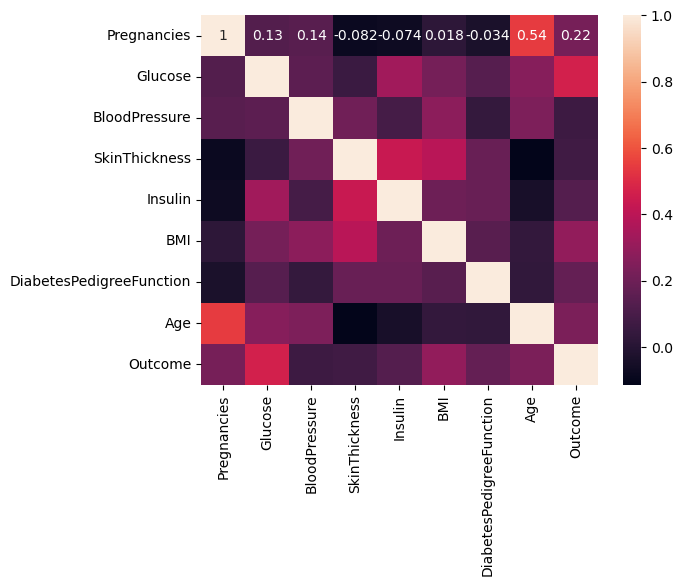

In [11]:
corr_matrix = diabetes_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

**Let's plot this dataset using some boxplots of each & every column of 'Diabetes.csv' dataset:**

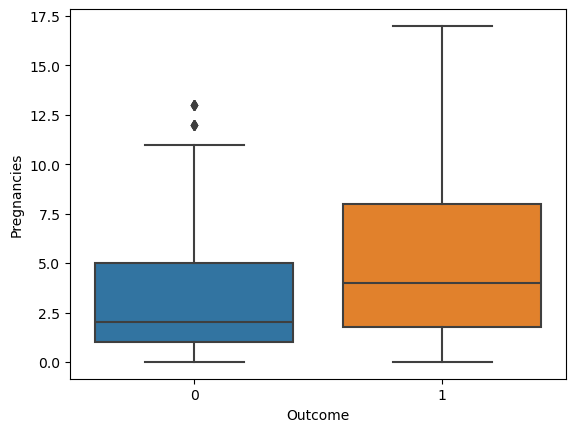

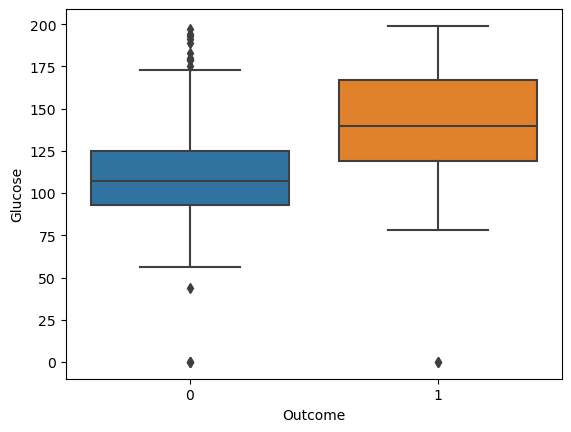

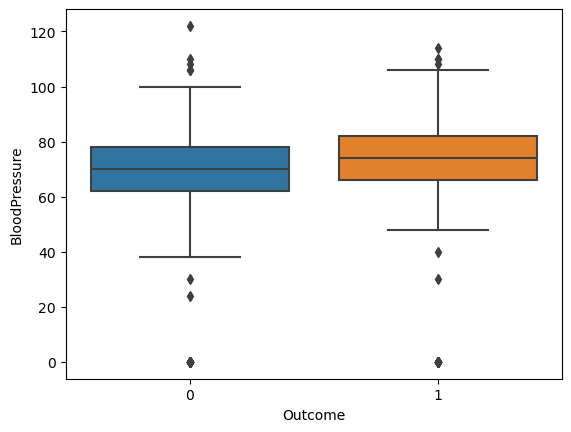

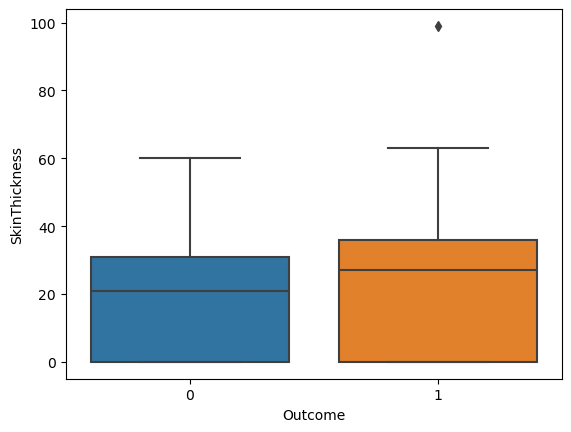

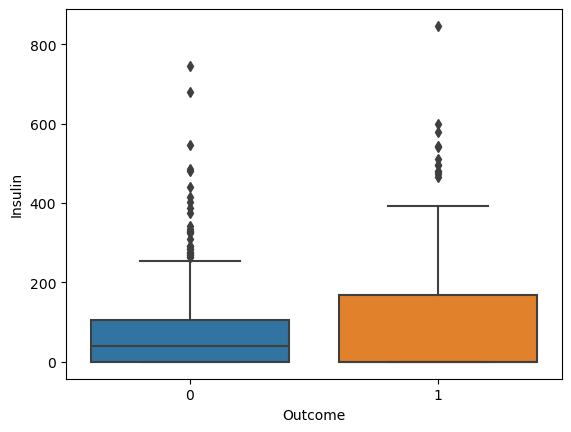

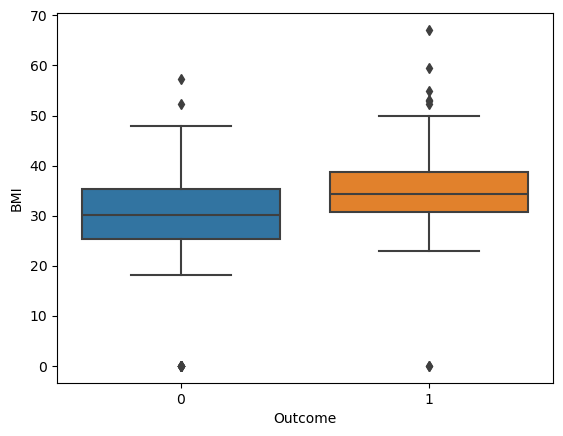

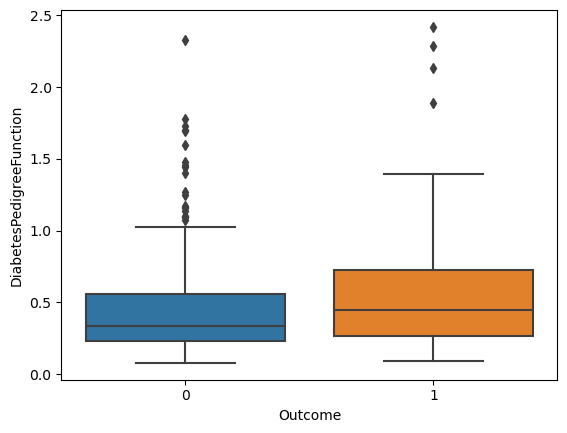

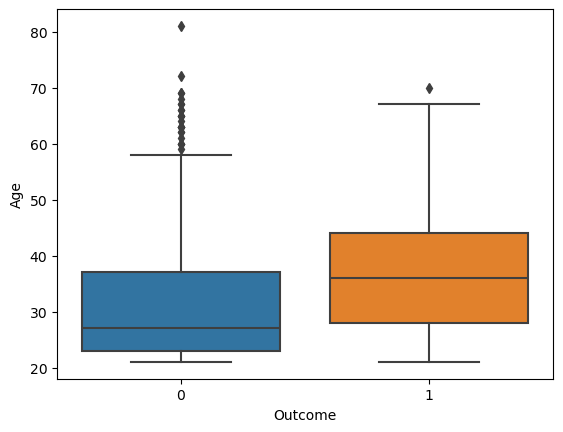

In [12]:
for col in diabetes_df.columns[:-1]:
    sns.boxplot(x="Outcome", y=col, data=diabetes_df)
    plt.show()

**Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.**

**A2.**

In [13]:
import pandas as pd
data = pd.read_csv("diabetes.csv")
data = data.dropna()
data["Outcome"] = data["Outcome"].apply(lambda x: 1 if x == 1 else 0)

In [14]:
import numpy as np
def remove_outliers(data, col):
    Q1 = np.percentile(data[col], 25)
    Q3 = np.percentile(data[col], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
for col in data.columns[:-1]:
    data = remove_outliers(data, col)

In [15]:
data = pd.get_dummies(data)

In [16]:
# Check for missing values
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


**Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.**

**A3.**

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("diabetes.csv")

# Split the dataset into a training set and a test set
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Separate the features and target variables for the training set
train_features = train_data.drop("Outcome", axis=1)
train_target = train_data["Outcome"]

# Separate the features and target variables for the test set
test_features = test_data.drop("Outcome", axis=1)
test_target = test_data["Outcome"]

**Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.**

**A4.**

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a decision tree classifier object
clf = DecisionTreeClassifier()

# Define the hyperparameters to tune
params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 9],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Use grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(clf, params, cv=5)
grid_search.fit(train_features, train_target)

# Print the best hyperparameters found by grid search
print(grid_search.best_params_)

# Train the decision tree model with the best hyperparameters on the training set
best_clf = DecisionTreeClassifier(**grid_search.best_params_)
best_clf.fit(train_features, train_target)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


DecisionTreeClassifier(criterion='entropy', max_depth=3)

**Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.**

**A5.**

In [19]:
from sklearn import metrics

# Make predictions on the test set
test_predictions = best_clf.predict(test_features)

# Calculate accuracy, precision, recall, and F1 score
accuracy = metrics.accuracy_score(test_target, test_predictions)
precision = metrics.precision_score(test_target, test_predictions)
recall = metrics.recall_score(test_target, test_predictions)
f1_score = metrics.f1_score(test_target, test_predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 0.7662337662337663
Precision: 0.6862745098039216
Recall: 0.6363636363636364
F1 Score: 0.660377358490566


**Let's plot the 'Diabetes.csv' dataset using heatmaps through confusion matrix method:**

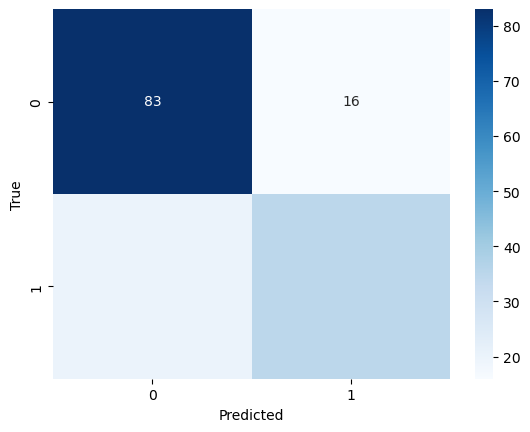

In [20]:
# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_target, test_predictions)

# Plot the confusion matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

**Let's plot the 'Diabetes.csv' dataset using line graphs (simple line as well as dotted line) for ROC curves, as well as the AUC curve method:**

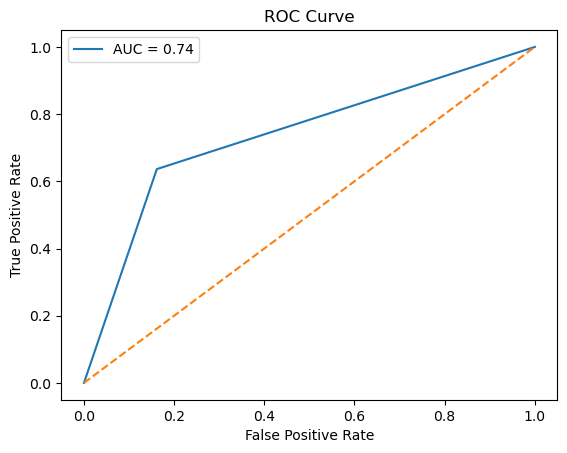

In [21]:
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = metrics.roc_curve(test_target, test_predictions)

# Calculate the AUC (area under the curve) of the ROC curve
auc = metrics.roc_auc_score(test_target, test_predictions)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

**Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.**

**A6.**

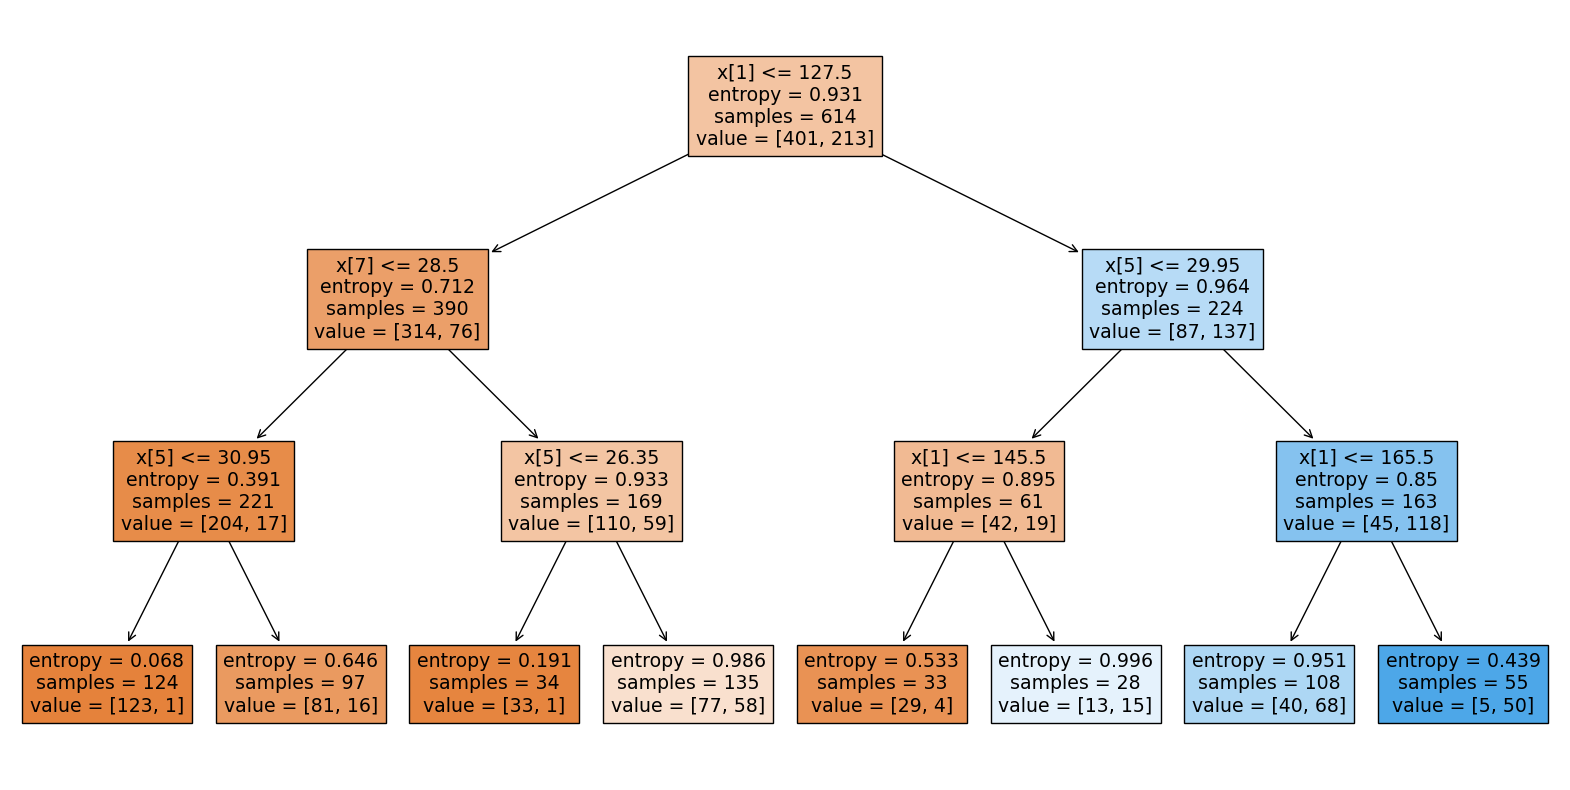

In [22]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(best_clf, filled=True)
plt.show()

**Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.**

**A7.**

One way to validate the decision tree model is to apply it to new data that was not used in training or testing. This can help determine if the model can generalize to unseen data and perform well in real-world scenarios. Another way to test the robustness of the model is to perform sensitivity analysis and scenario testing. To validate the decision tree model, we can apply it to new data that was not used for training or testing. This can help us assess the generalizability of the model and its ability to perform well on unseen data. Also, we can simulate different scenarios to test its robustness and generalizability.

One way to do this is to use a hold-out dataset, which is a set of data that was not used for training or tuning the model. We can apply the trained decision tree model to this hold-out dataset and evaluate its performance using the same metrics as before, such as accuracy, precision, recall, and F1 score. If the performance of the model on the hold-out dataset is similar to the performance on the test set, it suggests that the model is able to generalize well to new data.

Sensitivity analysis involves varying the input variables and observing the effect on the output. For example, we can test how sensitive the model is to changes in the threshold values used for splitting the nodes. We can also test how sensitive the model is to changes in the relative importance of the input variables.

Scenario testing involves simulating different scenarios and testing the model's performance under different conditions. For example, we can test how the model performs when the prevalence of diabetes in the population changes, or when the distribution of the input variables changes due to changes in the environment or population demographics.

Robustness testing involves testing the model's performance under different environmental conditions, such as changes in the data collection process or changes in the population being studied. This can help us determine if the model is still accurate and reliable in different contexts.

By performing sensitivity analysis and scenario testing, we can gain insights into the uncertainty and risks associated with the model and identify areas for improvement or further research.

Overall, validation is an important step in the model development process to ensure that the model is robust, accurate, and reliable in different scenarios and contexts. Validating a decision tree model involves assessing its performance on new data and testing its robustness and generalizability under different scenarios and conditions. This can help us gain confidence in the model's ability to make accurate predictions and support decision-making in real-world applications.

There are several ways to validate a decision tree model and test its robustness. Here are a few techniques:
1. **Cross-validation**: Cross-validation is a technique that involves dividing the dataset into several subsets and using each subset as a test set while using the remaining subsets as the training set. This technique can help evaluate the model's performance on different subsets of the data and avoid overfitting.
2. **Holdout testing**: Holdout testing involves splitting the dataset into two parts: a training set and a testing set. The model is trained on the training set and then tested on the testing set. This technique can help evaluate the model's performance on unseen data.
3. **Sensitivity analysis**: Sensitivity analysis involves varying the input variables and observing how the output changes. This technique can help assess how sensitive the model is to changes in the data and can identify which variables have the greatest impact on the output.
4. **Scenario testing**: Scenario testing involves testing the model's performance under different scenarios or assumptions. For example, one might test the model's performance if there is missing data, if there are errors in the input data, or if the distribution of the input data changes.